# Lineare Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, precision=4)

In [2]:
budget = np.array([1000, 2000, 4000, 5000])
absatz = np.array([1700, 3000, 5500, 4000])

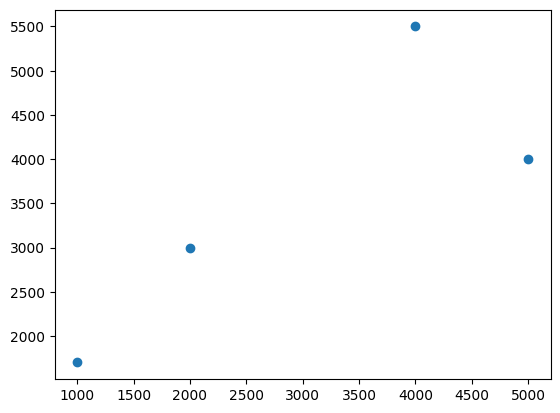

In [3]:
plt.scatter(budget, absatz)
plt.show()

## Empirischer Korrelationskoeffizient $r_{x,y}$

In [4]:
r = np.corrcoef(budget, absatz)[0][-1]
np.round(r, decimals=4)

0.8075

$|r_{x,y}| \approx 1 \implies$ näherungsweise linearer Zusammenhang

## Regressionsgerade

$$p(x) = w_1 + w_2 x$$

In [5]:
n = len(budget)
X = np.vstack([np.ones(n), budget]).T
print(X)

[[   1. 1000.]
 [   1. 2000.]
 [   1. 4000.]
 [   1. 5000.]]


In [6]:
W = np.linalg.lstsq(X, absatz, rcond=None)[0]
print(W)
print(f'f(x) = {W[0]:.4f} + {W[1]:.4f} * x')

def p(x):
    return W[0] + W[1] * x

[1420.      0.71]
f(x) = 1420.0000 + 0.7100 * x


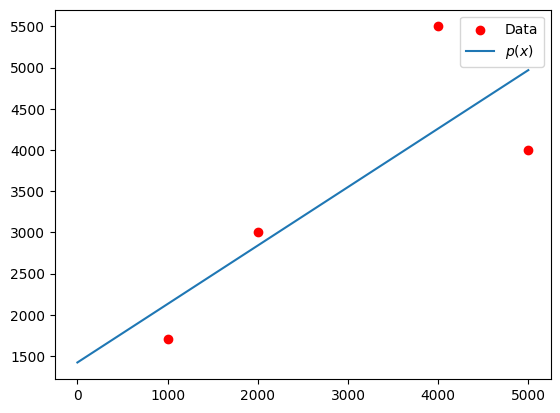

In [7]:
plt.scatter(budget, absatz, color='r', label='Data')

x_plot = np.linspace(0, budget[-1])
plt.plot(x_plot, p(x_plot), label='$p(x)$')

plt.legend()
plt.show()

In [8]:
# Prognose
np.round(p(3000), decimals=4)

3550.0

## Exponentieller Zusammenhang

$$f(x) = a_0 \cdot \mathrm{e}^{a_1 \cdot x}$$

$\implies$ Transformation zu linearem Zusammenhang mittels $\ln$

$$
y_i = f(x_i) = a_0 \cdot \mathrm{e}^{a_1 \cdot x_i} \\~\\

\begin{align*}
    \Rightarrow \ln(y) &= \ln(a_0 \cdot \mathrm{e}^{a_1x}) \\
    &= \ln(a_0) + a_1x & |~\hat{a}_0 = \ln(a_0) \\
    \Rightarrow \ln(y) &= \hat{a}_0 + a_1x
\end{align*}
$$

**Achtung:** auf die Label muss für das LGS entsprechend der $\ln$ angewendet werden!

In [9]:
# ln(y) !!
W_hat = np.linalg.lstsq(X, np.log(absatz), rcond=None)[0]
print(W_hat)

[7.3926 0.0002]


Umwandlung von $\widehat{W}$:
- $\hat{a}_0 = \ln(a_0) \Rightarrow a_0 = \exp(\hat{a}_0)$
- $\hat{a}_1 = a_1$

In [10]:
a_0 = np.exp(W_hat[0])
a_1 = W_hat[1]

print(np.array([a_0, a_1]))

[1623.8995    0.0002]


In [11]:
def f(x):
    # return np.exp(W_hat[0] + W_hat[1] * x)
    return a_0 * np.exp(a_1 * x)

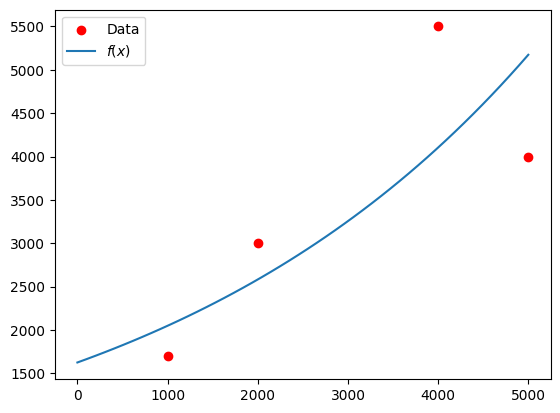

In [12]:
plt.scatter(budget, absatz, color='r', label='Data')

x_plot = np.linspace(0, budget[-1])
plt.plot(x_plot, f(x_plot), label='$f(x)$')

plt.legend()
plt.show()

In [13]:
# Prognose
np.round(f(3000), decimals=4)

3254.6045